# Data Scientist Professional Case Study

### Company Background

National Accessibility currently installs wheelchair ramps for office buildings and schools. The marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. They would like the help of the data science team in predicting which venues already have a ramp installed. 

### Customer Question

The marketing manager would like to know:
- Can you develop a model to predict whether an event venue already has a wheelchair ramp installed?

### Success Criteria

To reduce the amount of time wasted by the company contacting venues that already have a ramp, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 


### Dataset


The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

The first thing to do is to import the needed packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as met
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier

**DATA VALIDATION AND CLEANING**

The next thing is to import the needed dataset for validation and analysis.

In [2]:
df = pd.read_csv('Datacamp-Professional-Data-Scientist-Certification-Case-Study/event_venues.csv')
display(df.head())

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False


Let's have an overview of the dataset

In [3]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


None

The dataset contains 3910 entries of venues. Each entry has 10 columns to describe it. Generally, there is no missing data in any of the columns. That might be a good news but still calls for a closer look.
1. venue_name: The name of the venue to be described. The column contains objects as expected.

2. Loud music / events: Whether the venue hosts loud events. The column contains boolean values as expected.

3. Venue provides alcohol: Whether the venue provides alcohol. The column is numeric.*

4. Wi-Fi: Whether the venue provides wifi. It contains boolean values as expected.

5. supervenue: Whether the venue qualifies as a supervenue. It contains boolean values as expected.

6. U-Shaped_max: Total capacity of the U-shaped portion of the theatre. This column is expected to be integral, as we are talking about the number of people the U-shaped portion of the theatre can hold, but it is not! That calls for a closer look.*

7. max_standing: Total standing capacity of the venue. This column is integral as expected.

8. Theatre_max: Total capacity of the theatre. Again, this column contains float numbers while it is expected to contain integers. Another spot to look at again.*

9. Promoted / ticketed events: Whether the venue hosts promoted events. It contains boolean values as expected.

10. Wheelchair acessible: Whether the venue is accessible to wheelchairs. It contains boolean values as expected.

It is wise to explore each column one afer the other to see what is really going down in each.

* The asterisk on some numbers is to highlight which columns need special attention.

1. **VENUE_NAME**

In [4]:
print('There are', len(df['venue_name'].unique()), 'venues in the dataset.')
display('The top 10 repeated venues are:',df['venue_name'].value_counts(sort=True).head(10))


There are 1444 venues in the dataset.


'The top 10 repeated venues are:'

radisson blu edwardian heathrow    27
bma house                          24
friends house                      23
henry wood house                   19
30 euston square                   18
twickenham stadium                 15
one birdcage walk                  13
hilton london paddington           13
science museum                     13
the wesley conference hotel        12
Name: venue_name, dtype: int64

We can see that out of the 3910 entries that we have, only 1444 are unique. *Raddisson blu edwardian heathrow* appears 27 times. That insinuates that there are possibly duplicated rows. 

We will check if that is true and drop those duplicated rows.

In [5]:
print('There are', df.shape[0] - df.drop_duplicates().shape[0], 'duplicated rows')

There are 450 duplicated rows


450 rows have exactly the same entries in the 10 columns. That means there are still repeated venue names, but this time, with different entries in the features. That will make sense considering that some venues have the same name but are in different locations. 


The action taken after examining 'venue_name' is to drop all duplicated entries.

In [6]:
df = df.drop_duplicates()

print('There are now', df.shape[0], 'entries.')

There are now 3460 entries.


2. **LOUD MUSIC / EVENTS**

In [7]:
print('The distribution of the true and false values are thus,', '\n', df['Loud music / events'].value_counts())

The distribution of the true and false values are thus, 
 False    2137
True     1323
Name: Loud music / events, dtype: int64


The number of venues that support loud events are almost half the number of those who do not. This column is not in 1's and 0's. It needs further categorical encoding.

In [8]:
# Encode this column.
df['Loud music / events'] = pd.get_dummies(df['Loud music / events'], drop_first=True)

Let's confirm that.

In [9]:
display(df['Loud music / events'].head())

0    0
1    1
2    0
3    0
4    0
Name: Loud music / events, dtype: uint8

3. **Venue provides alcohol**

In [10]:
print('The distribution of the venues that provide alcohol (True) and those who do not (False) is as shown:', '\n', df['Venue provides alcohol'].value_counts())

The distribution of the venues that provide alcohol (True) and those who do not (False) is as shown: 
 1    2572
0     888
Name: Venue provides alcohol, dtype: int64


About 900 venues do not provide alcohol while over 2500 venues do. We may need to explore into this during the Exploratory analysis; but for now, let's focus on validation and cleaning. This column is in 1's and 0's already. There is no need for encoding.

4. **Wi-Fi**

In [11]:
print('This is how many venues provide Wi-Fi connection and do not:', '\n',df['Wi-Fi'].value_counts())

This is how many venues provide Wi-Fi connection and do not: 
 True     3211
False     249
Name: Wi-Fi, dtype: int64


Very few venues do not provide Wi-Fi as expected. This may tell a good story about those venues later. But we mustn't forget to encode this column.

In [12]:
df['Wi-Fi'] = pd.get_dummies(df['Wi-Fi'], drop_first=True)

Let's see if that is done.

In [13]:
display(df['Wi-Fi'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wi-Fi, dtype: uint8

5. **supervenue**

In [14]:
print('There are', (df['supervenue'] == 1).sum(), 'supervenues in this dataset.')
print('More details here:', '\n', df['supervenue'].value_counts())


There are 208 supervenues in this dataset.
More details here: 
 False    3252
True      208
Name: supervenue, dtype: int64


This column needs to be encoded too.

Just about 200 venues are supervenues. The condition for being a supervenue might be strict.

In [15]:
df['supervenue'] = pd.get_dummies(df['supervenue'], drop_first=True)

Is it really done? Let's check.

In [16]:
display(df['supervenue'].head())

0    0
1    0
2    0
3    0
4    0
Name: supervenue, dtype: uint8

6. **U-Shaped_max**

In [17]:
print(df['U-Shaped_max'].describe(percentiles=[.1, .2, .95, .99, .995, .999]))

count    3460.000000
mean       35.093431
std        46.643692
min         1.000000
10%        20.000000
20%        35.045455
50%        35.045455
95%        43.050000
99%        80.000000
99.5%     100.000000
99.9%     227.050000
max      2520.000000
Name: U-Shaped_max, dtype: float64


Maybe a  density plot can help.

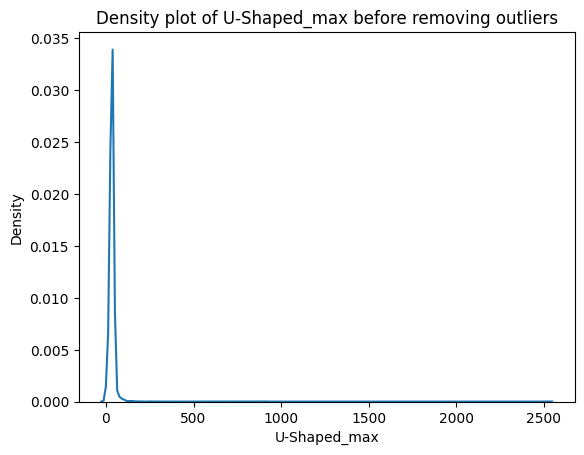

In [18]:
sns.kdeplot(df['U-Shaped_max'])
plt.title('Density plot of U-Shaped_max before removing outliers')
plt.show()

It is evident that there are a few outliers. Most of the data (95%) lies below and 43. It is either an error in the entry or the said venues are extremely large. Since very few portion of the data (.5%) is above 100, and a further smaller(.1%) goes above 204, it is sensible to drop those unreasonably large ones.


On the other hand, a whooping 50% of the data lie below 35, some even have a value of 1! It is unlikely that the U-portion of a theatre will hold just one person or 35. 100 or 3500 is more likely. So I will multiply that row by 100.

Let's do a tricky check of the values.

In [19]:
print(df['U-Shaped_max'].value_counts())

35.045455     2514
30.000000      107
20.000000       91
40.000000       75
15.000000       49
              ... 
54.000000        1
200.000000       1
29.000000        1
160.000000       1
58.000000        1
Name: U-Shaped_max, Length: 81, dtype: int64


Over 2500 rows in this column have 35.045455 as the value for U-Shaped_max. That explains why the column is labelled a float. There is no clear explanation for that in the data description, so I will assume it is an input error. To solve that, I will round the column to the nearest whole number.

Now, let's implement our action points.

* round the values to the nearest whole numbers

* check the rows that are above 204 and remove the extra large ones

* multiply the column by 100

In [20]:
# 1. Round the values to the nearest whole numbers
df['U-Shaped_max'] = df['U-Shaped_max'].round()
print(df['U-Shaped_max'].head())

0    35.0
1    40.0
2    35.0
3    35.0
4    35.0
Name: U-Shaped_max, dtype: float64


In [21]:
# 2. Check the rows that are greater than 204

display('The following rows are over 204:', df[df['U-Shaped_max'] > 204])

'The following rows are over 204:'

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
2014,stockley park golf club,1,1,1,0,250.0,1000,700.000000,True,True
3007,white hart events park,1,0,1,0,900.0,1800,1200.000000,True,True
3122,cabana @ stratford,1,0,1,0,2520.0,25,112.715867,True,True
3150,east ham,1,0,1,0,290.0,600,300.000000,True,True


We can notice that 2 of the highest .1% are still less than 300. Those values are small when compared to 2520 and 900. So, let's drop the 2520 row and leave the rest.

In [22]:
# 3. Drop the highest value
df.drop([3007, 3122], axis=0, inplace=True)

In [23]:
# 4. Finally, we multiply the column by 100.
df['U-Shaped_max'] = df['U-Shaped_max'] * 100

Let's see what we have done. We will:
* plot the kdeplot again and see how the outliers are doing
* check the column description again to see if floats have been taken care of
* print a few rows to see if the multiplication by 100 was well-done.

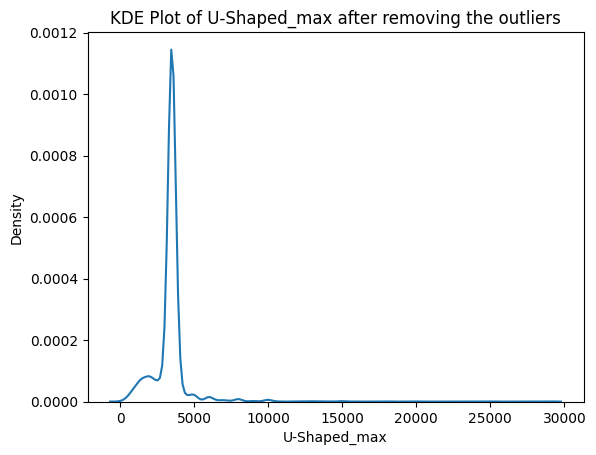

count     3458.000000
mean      3409.167149
std       1316.590406
min        100.000000
25%       3500.000000
50%       3500.000000
75%       3500.000000
max      29000.000000
Name: U-Shaped_max, dtype: float64

0    3500.0
1    4000.0
2    3500.0
3    3500.0
4    3500.0
Name: U-Shaped_max, dtype: float64

In [24]:
# plot the kdeplot again
sns.kdeplot(df['U-Shaped_max'])
plt.title('KDE Plot of U-Shaped_max after removing the outliers')
plt.show()

# check the column description
display(df['U-Shaped_max'].describe())

# print a few rows
display(df['U-Shaped_max'].head())

7. **max_standing**

In [25]:
print('The summary of max_standing is', '\n', df['max_standing'].value_counts())

The summary of max_standing is 
 0       668
100     224
50      194
60      165
200     162
       ... 
5000      1
880       1
440       1
490       1
169       1
Name: max_standing, Length: 138, dtype: int64


It makes sense that 668 venues have no standing space at all and a few others have space for 1000s people. The column is integral as expected.

8. **Theatre_max**

In [26]:
print('This is the reason why this column is float:', '\n', df['Theatre_max'].value_counts())

This is the reason why this column is float: 
 112.715867     1893
40.000000       131
60.000000       107
30.000000        99
80.000000        96
               ... 
7.000000          1
1700.000000       1
106.000000        1
43.000000         1
11.000000         1
Name: Theatre_max, Length: 166, dtype: int64


Just like the U-Shaped_max column, we have 112.715867 appearing about 2000 times. That is unexplainable, but that number of row is to high to be dropped. I just round it up to the nearest whole number as before.

Then, I will proceed to view a description of the column.

In [27]:
# Round the column to the nearest whole number
df['Theatre_max'] = df['Theatre_max'].round(0)

# Check the description
print(df['Theatre_max'].describe(percentiles=[.5, .20, .90, .95, .99, .995, .999]))

count    3458.000000
mean      113.129265
std       137.432809
min         1.000000
20%        50.800000
50%       113.000000
90%       120.000000
95%       200.000000
99%       544.300000
99.5%     814.300000
99.9%    1932.489000
max      4000.000000
Name: Theatre_max, dtype: float64


Even without a box plot, we can see that there are outliers here. 99.9% of the data falls below 1933, yet there is a 4000 value (almost twice!). We will check for the values beyond 1933 and drop them accordingly.

In [28]:
print('The rows above 1933 are:', '\n', df[df['Theatre_max'] > 1933])

The rows above 1933 are: 
             venue_name  Loud music / events  Venue provides alcohol  Wi-Fi  \
943              troxy                    1                       1      1   
2377          barbican                    0                       1      1   
2708  evolution london                    1                       0      0   
3606  alexandra palace                    1                       1      1   

      supervenue  U-Shaped_max  max_standing  Theatre_max  \
943            0        3500.0          1500       2000.0   
2377           0        3500.0             0       1943.0   
2708           0        3500.0          4000       4000.0   
3606           0        3500.0          2500       2500.0   

      Promoted / ticketed events  Wheelchair accessible  
943                         True                  False  
2377                        True                   True  
2708                        True                   True  
3606                        True            

Here, there are 4 rows above that mark one of which is close enough for pardon (1943). Apart from this, we drop every one of those rows.

In [29]:
df.drop([943, 2708, 3606], axis=0, inplace=True)

Let's check with a kdeplot and the column description.

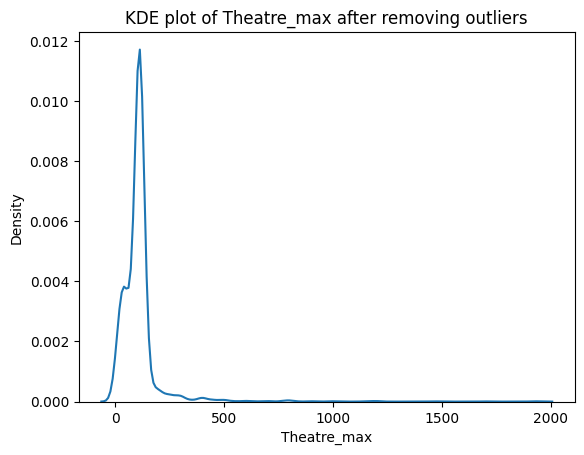

count    3455.000000
mean      110.767294
std       108.832001
min         1.000000
25%        70.000000
50%       113.000000
75%       113.000000
max      1943.000000
Name: Theatre_max, dtype: float64


In [30]:
# Plot a kde plot
sns.kdeplot(df['Theatre_max'])
plt.title('KDE plot of Theatre_max after removing outliers')
plt.show()


# Column description
print(df['Theatre_max'].describe())

Now, we notice that some venues have Theatre_max values of 1. That does not make sense. It is more reasonable to say a venue can hold 100 people than just 1 person. The assumption being made here is that this column was recorded in 100s.

In [31]:
df['Theatre_max'] = df['Theatre_max'] * 100

9. **Promoted / ticketed events**

In [32]:
print('This is the summary of this column:', '\n', df['Promoted / ticketed events'].value_counts())

This is the summary of this column: 
 False    2083
True     1372
Name: Promoted / ticketed events, dtype: int64


Most of the venues here do not promote ticketed events. Well, let's encode this column and move on.

In [33]:
df['Promoted / ticketed events'] = pd.get_dummies(df['Promoted / ticketed events'], drop_first=True)

Is that done?

In [34]:
print(df['Promoted / ticketed events'].info())

<class 'pandas.core.series.Series'>
Int64Index: 3455 entries, 0 to 3909
Series name: Promoted / ticketed events
Non-Null Count  Dtype
--------------  -----
3455 non-null   uint8
dtypes: uint8(1)
memory usage: 30.4 KB
None


10. **Wheelchair accessible**

In [35]:
print("Finally, let/'s view the target column:", '\n', df['Wheelchair accessible'].value_counts())

Finally, let/'s view the target column: 
 True     1799
False    1656
Name: Wheelchair accessible, dtype: int64


This feature is well-distributed when compared to other features we have seen. The 2 cateogories are almost equally represented. But, we must encode and check.

In [36]:
df['Wheelchair accessible'] = pd.get_dummies(df['Wheelchair accessible'], drop_first=True)

print(df['Wheelchair accessible'].info())

<class 'pandas.core.series.Series'>
Int64Index: 3455 entries, 0 to 3909
Series name: Wheelchair accessible
Non-Null Count  Dtype
--------------  -----
3455 non-null   uint8
dtypes: uint8(1)
memory usage: 30.4 KB
None


Now that we have dealt with every column we can just take a quickview at the cleaner dataset.

In [37]:
display(df.head())
print('\n')
display(df.describe())
print('\n')
display(df.info())

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,3500.0,0,11300.0,0,0
1,green rooms hotel,1,1,1,0,4000.0,120,8000.0,1,0
2,148 leadenhall street,0,0,1,0,3500.0,0,11300.0,0,0
3,conway hall,0,0,1,0,3500.0,60,6000.0,0,0
4,gridiron building,0,0,1,0,3500.0,0,11300.0,0,0


,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
count,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000
mean,0.381476,0.743849,0.928220,0.060203,3409.088278,123.729667,11076.729378,0.397106,0.520695
std,0.485819,0.436569,0.258161,0.237896,1317.159327,272.971503,10883.200095,0.489369,0.499644
min,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3500.000000,20.000000,7000.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3500.000000,60.000000,11300.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,3500.000000,150.000000,11300.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,29000.000000,7500.000000,194300.000000,1.000000,1.000000




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3455 non-null   object 
 1   Loud music / events         3455 non-null   uint8  
 2   Venue provides alcohol      3455 non-null   int64  
 3   Wi-Fi                       3455 non-null   uint8  
 4   supervenue                  3455 non-null   uint8  
 5   U-Shaped_max                3455 non-null   float64
 6   max_standing                3455 non-null   int64  
 7   Theatre_max                 3455 non-null   float64
 8   Promoted / ticketed events  3455 non-null   uint8  
 9   Wheelchair accessible       3455 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(5)
memory usage: 178.8+ KB


None

After the long and elaborate cleaning we arrive at a dataset of 3455 rows and 10 columns
* I encoded the categorical columns that were not categorized (Note that 0 means False everywhere)
* I removed extremely large values from 2 columns
* I rounded two decimal columns to whole numbers
* I assumed that two columns were recorded in 100s, and I multiplied the values by 100 accordingly

**DATA VISUALIZATION AND EXPLORATORY DATA ANALYSIS**

There are a lot of information hidden in this dataset and I just need right questions to bring them out.
* There are very few supervenues. Maybe the criteria are really high. Are supervenues more likey to be Wheelchair accessible?
* How does Theatre_max relate to max_standing?
* Are venues that have large capacities more likely to be accessible to wheelchairs?

*Are supervenues more likely to be accessible to wheelchairs?*

A countplot can show that.

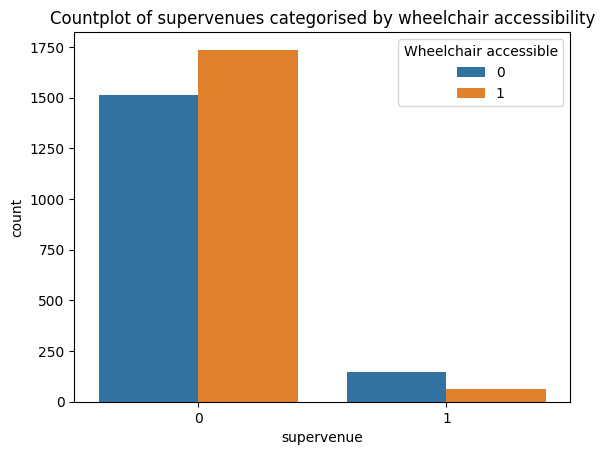

In [38]:
sns.countplot(x='supervenue', data=df, hue='Wheelchair accessible')
plt.title('Countplot of supervenues categorised by wheelchair accessibility')
plt.show()

It seems like most supervenues do not have ramps.

In [39]:
supervenue = df[df['supervenue'] == True].shape[0]
non_supervenue = df[df['supervenue'] == False].shape[0]

supervenue_and_wheelchair_accessible = df[(df['supervenue'] == True) & (df['Wheelchair accessible'] == True)].shape[0]
supervenue_and_not_wheelchair_accessible = df[(df['supervenue'] == True) & (df['Wheelchair accessible'] == False)].shape[0]

non_supervenue_and_wheelchair_accessible = df[(df['supervenue'] == False) & (df['Wheelchair accessible'] == True)].shape[0]
non_supervenue_and_not_wheelchair_accessible = df[(df['supervenue'] == False) & (df['Wheelchair accessible'] == False)]


print(supervenue_and_wheelchair_accessible * 100 / supervenue, '% of supervenues are wheelchair accessible' )
print(non_supervenue_and_wheelchair_accessible * 100 / non_supervenue, '% of non_supervenues are wheelchair accessible')

30.28846153846154 % of supervenues are wheelchair accessible
53.46473668001232 % of non_supervenues are wheelchair accessible


It is now evident that most supervenues do not have ramps. That might be because ramps are not one of the criteria of being a supervenue. We can consider making it one of the criteria.

*How does Theatre_max relate to max_standing?*

Scatter plot will be the best way to reveal the relationship.

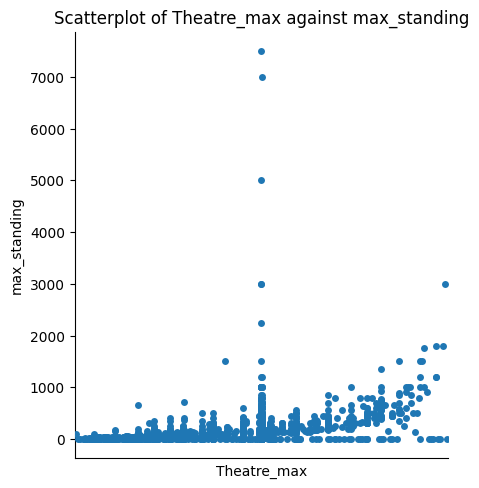

In [40]:
sns.catplot(x='Theatre_max', y='max_standing', data=df)
plt.title('Scatterplot of Theatre_max against max_standing')
plt.xticks([], rotation=90)
plt.show()

What about the correlation?


In [41]:
print('The correlation between max_standing and Theatre_max is', df['max_standing'].corr(df['Theatre_max']))

The correlation between max_standing and Theatre_max is 0.35274817244730555


There is no strong linear correlation between the two features. Yet, there might be a higher degree correlation

*Are venues that have large capacity more likely to be wheelchair accessible?*

Let's see a categorical plot

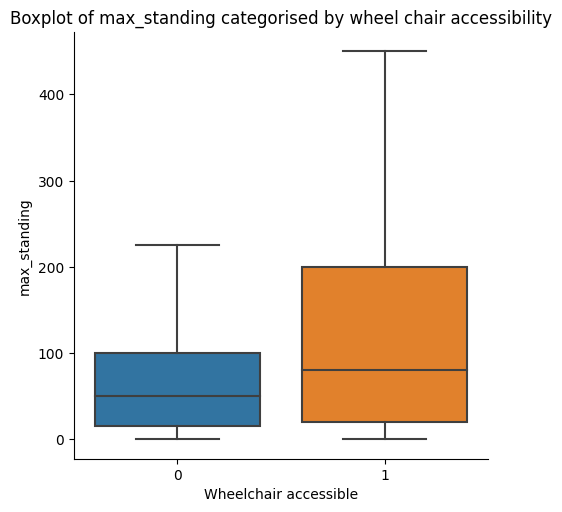

In [42]:
sns.catplot(x='Wheelchair accessible', y='max_standing', data=df, kind='box', sym='')
plt.title('Boxplot of max_standing categorised by wheel chair accessibility')
plt.show()

From the above diagram, we can see that the average max_standing of venues with ramps is higher than that of venues without ramps. We can say that 'it is possible that larger venues have ramps.'

**MODEL DEVELOPMENT**

This is a classification problem (we are classifying venues into 2 categories based on whether they are accessible to wheelchairs or not). A lot of models are available in scikit-learn to achieve this but K-Nearest Neighbour, Decision Tree Classifier and Support Vector Classification stand out for their ability to capture data without overfitting. They are also easy to tune and fast to fit. These 3 models will be fitted and if need be, they will be combined together to achieve more trustworthy results.

Before fitting any model, they target variable will be separated from the features. Also, the venue_name will be dropped before fitting any model. This is because there are 1444 venues as we have seen before; encoding them will not be an effective feature engineering especially considering that we have only over 3000 entries.


Also we need to determine how to evalaute the model before setting out.

We need to save time and resources while reaching out to event centres. At least 2 out of every 3 (67%) venues we contact must truly not have a ramp. That means if we predict that 3 venues do not have a ramp, at least 2 of them should really not have. Thus, we are looking at getting our precision for the False value(venues that do not have ramps) above 67%. The classification report gives that to us under the **precision** column and the **0** row. While we are keeping an eye on that figure, we will seek to maximize the f1-score of each model, since a good f1-score guarantees that false negatives and false positives are minimized.

In [43]:
X = df.drop(['venue_name', 'Wheelchair accessible'], axis=1)
y = df['Wheelchair accessible']

Next, we create training set (X_train, y_train), a test set(X_test, y_test) and a validation set(X_val, y_val). The training set will be 80% of the total dataset while the test and validation sets will be 10% each.

In [44]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, stratify=y, random_state=1122, test_size=.2)
X_test, X_val, y_test, y_val = train_test_split(X_hold, y_hold, random_state=1122, train_size=.5)

*Fitting KNN*

Since many models are going to be fit, it is easier to create an evaluation function than to type lines of code over and over again.

In [45]:
def assess(true_value, predicted_value):
    cm = confusion_matrix(true_value, predicted_value)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cr = classification_report(true_value, predicted_value)
    print(cm)
    # disp.plot()
    print(cr)
    
def assess_classifier(model):
    '''
    My classification model assessment function
    '''
    
    train_acc = met.accuracy_score(y_train, model.predict(X_train))
    train_bal_acc = met.balanced_accuracy_score(y_train, model.predict(X_train))
    train_f1 = met.f1_score(y_train, model.predict(X_train))
    train_recall = met.recall_score(y_train, model.predict(X_train))
    train_precision = met.precision_score(y_train, model.predict(X_train))
    
    test_acc = met.accuracy_score(y_test, model.predict(X_test))
    test_bal_acc = met.balanced_accuracy_score(y_test, model.predict(X_test))
    test_f1 = met.f1_score(y_test, model.predict(X_test))
    test_recall = met.recall_score(y_test, model.predict(X_test))
    test_precision = met.precision_score(y_test, model.predict(X_test))
    
    val_acc = met.accuracy_score(y_val, model.predict(X_val))
    val_bal_acc = met.balanced_accuracy_score(y_val, model.predict(X_val))
    val_f1 = met.f1_score(y_val, model.predict(X_val))
    val_recall = met.recall_score(y_val, model.predict(X_val))
    val_precision = met.precision_score(y_val, model.predict(X_val))
    
    dafa = pd.DataFrame({
        'Accuracy':[train_acc, test_acc, val_acc],
        'Balanced Accuracy':[train_bal_acc, test_bal_acc, val_bal_acc],
        'F1 score':[train_f1, test_f1, val_f1],
        'Recall':[train_recall, test_recall, val_recall],
        'Precision':[train_precision, test_precision, val_precision]}, 
        
        index=['Train', 'Test', 'Validation']
    )
    display(dafa)

We will instantiate the 3 models and the scoring function, tune them using Cross-validation and then pick the best.

In [46]:
knn = KNeighborsClassifier()

dtc = DecisionTreeClassifier()

svc = SVC()

# The scoring function
f1 = make_scorer(f1_score)

Tuning knn

In [47]:
knn_param = {'n_neighbors':[10, 30, 50, 80],
        'leaf_size':[5, 9, 15]}

knn_cv = GridSearchCV(estimator=knn, param_grid=knn_param, cv=5, scoring=f1)
knn_cv.fit(X_train, y_train)

assess_classifier(knn_cv.best_estimator_)
print('The best parameter set for knn is', knn_cv.best_params_)

,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.656657,0.656147,0.669683,0.668520,0.670851
Test,0.643478,0.643450,0.639296,0.633721,0.644970
Validation,0.690751,0.689671,0.711590,0.702128,0.721311


The best parameter set for knn is {'leaf_size': 5, 'n_neighbors': 50}


Tuning Decision Tree Classifier

In [48]:
dtc_param ={
    'max_depth': [3, 5, 9, 20, 50],
    'min_samples_split':[2, 4],
    'min_samples_leaf':[1, 5, 10],
    'max_features': [2, 5, 10],
    'max_leaf_nodes':[2, 5, 10]
}

dtc_cv = GridSearchCV(estimator=dtc, param_grid=dtc_param, scoring=f1, cv=5)
dtc_cv.fit(X_train, y_train)


assess(y_train, dtc_cv.best_estimator_.predict(X_train))
print('The best parameter set for Decision Tree Classifier is', dtc_cv.best_params_)

[[ 753  572]
 [ 410 1029]]
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1325
           1       0.64      0.72      0.68      1439

    accuracy                           0.64      2764
   macro avg       0.65      0.64      0.64      2764
weighted avg       0.64      0.64      0.64      2764

The best parameter set for Decision Tree Classifier is {'max_depth': 3, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


Tuning SVC

In [49]:
'''
svc_param = {
    'C':[1, 10, 15, 20],
    'degree':[1, 2, 3],
    'gamma':[0.05, 0.1, .9]
    
}

svc_cv = GridSearchCV(estimator=svc, param_grid=svc_param, scoring=f1, cv=10)
svc_cv.fit(X_train, y_train)

assess(y_train, svc_cv.best_estimator_.predict(X_train))     
print('The best parameters for svc are', svc_cv.best_params_)
'''

"\nsvc_param = {\n    'C':[1, 10, 15, 20],\n    'degree':[1, 2, 3],\n    'gamma':[0.05, 0.1, .9]\n    \n}\n\nsvc_cv = GridSearchCV(estimator=svc, param_grid=svc_param, scoring=f1, cv=10)\nsvc_cv.fit(X_train, y_train)\n\nassess(y_train, svc_cv.best_estimator_.predict(X_train))     \nprint('The best parameters for svc are', svc_cv.best_params_)\n"

Taking a look at the assessment of the 3 models, svc did best with 81% precision on the 0 target. Let's see how they all do on the test set.

knn on test set

In [50]:
assess(y_test, knn_cv.best_estimator_.predict(X_test))

[[113  60]
 [ 63 109]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       173
           1       0.64      0.63      0.64       172

    accuracy                           0.64       345
   macro avg       0.64      0.64      0.64       345
weighted avg       0.64      0.64      0.64       345



knn is seen to have 64% precision on train set and 65% on test.

On to DTC

In [51]:
assess(y_test, dtc_cv.best_estimator_.predict(X_test))

[[ 99  74]
 [ 53 119]]
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       173
           1       0.62      0.69      0.65       172

    accuracy                           0.63       345
   macro avg       0.63      0.63      0.63       345
weighted avg       0.63      0.63      0.63       345



dtc is seen to have 65% precision on train set and 64% on test.

On to svc

In [52]:
# assess(y_test, svc_cv.best_estimator_.predict(X_test))

svc is seen to have 81% precision on the train set and 67% on the test set. That implies overfitting. knn and dtc are definitely not overfitted and they have precisions close to 2/3 of the dataset. We will judge the best between the two by testing them on the validation set.

dtc first

In [53]:
assess(y_val, dtc_cv.best_estimator_.predict(X_val))

[[ 93  65]
 [ 46 142]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       158
           1       0.69      0.76      0.72       188

    accuracy                           0.68       346
   macro avg       0.68      0.67      0.67       346
weighted avg       0.68      0.68      0.68       346



DTC still hase 64% precision. What about knn?

In [54]:
assess(y_val, knn_cv.best_estimator_.predict(X_val))

[[107  51]
 [ 56 132]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       158
           1       0.72      0.70      0.71       188

    accuracy                           0.69       346
   macro avg       0.69      0.69      0.69       346
weighted avg       0.69      0.69      0.69       346



knn has 63%. Although the difference is not much, there is a good assurance that dtc will repeat its performance on more unseen datasets, unlike svc. Moreover, dtc allows to easily explore how important each feature is to the results.

Therefore, the king model is **DecisionTreeClassifier**

In [55]:
assess_classifier(dtc_cv.best_estimator_)
assess_classifier(knn_cv.best_estimator_)


,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.644718,0.641691,0.676974,0.715080,0.642723
Test,0.631884,0.632057,0.652055,0.691860,0.616580
Validation,0.679191,0.671963,0.718987,0.755319,0.685990


,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.656657,0.656147,0.669683,0.668520,0.670851
Test,0.643478,0.643450,0.639296,0.633721,0.644970
Validation,0.690751,0.689671,0.711590,0.702128,0.721311


In [56]:
model = dtc_cv.best_estimator_

How important is each feature to the results we have?

Let's visualize it.

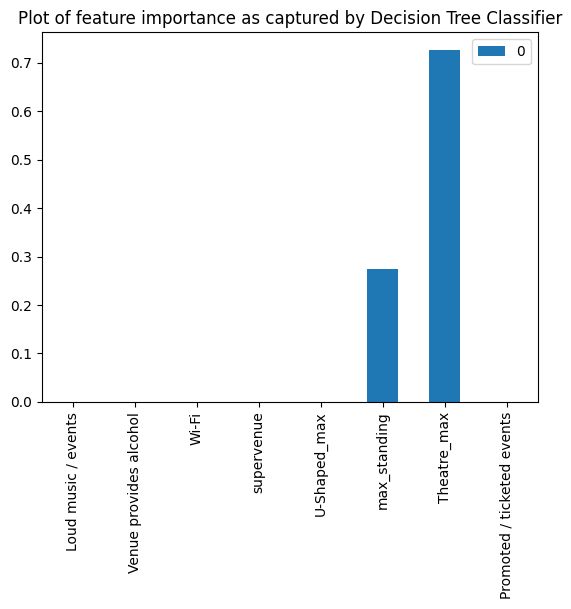

In [57]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns)
feature_importance.plot(kind='bar')
plt.title('Plot of feature importance as captured by Decision Tree Classifier')
plt.show()

Expectedly, the capacity of the venue is the strongest predictor that it will be wheelchair accessible or not. That implies that National accessibilty should pay more attention to venue size more. As established before, larger venues are more likely to have ramps.

**BUSINESS FOCUS**

The major problem NA is facing is the huge amount of money and time spent in reaching out to venues concerning their accessibility to wheelchairs. The purpose of this analysis is to reduce the amount of resources spent in the process by ensuring that almost every venue contacted does not have a ramp. The models developed have been able to approach that with assurance. It saves resources to first predict if the venue has a ramp (using these models) than to try reaching all of them.

The two models confidently assure that 2/3 of the venues they label not to have Wheelchair accessibility are correct.

In addition to the prediction,I recommend that future analysis should pay more attention venue description, building shape and size as those are very strong indicators of Wheelchair accessiblity.

--------------------------------------------------------------------------------------------------------------------

Let's stack these models and see the outcome

In [58]:
lsvc = LinearSVC(max_iter=1000)

lsvc.fit(X_train, y_train)


assess_classifier(lsvc)

C:\Users\Tosin OLUYEMII\.conda\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.504703,0.517686,0.299027,0.202919,0.568093
Test,0.501449,0.500504,0.258621,0.174419,0.500000
Validation,0.473988,0.504343,0.241667,0.154255,0.557692


In [59]:
rfc = RandomForestClassifier(max_depth=8)

rfc.fit(X_train, y_train)

assess_classifier(rfc)

,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.710203,0.710800,0.714439,0.696317,0.733529
Test,0.637681,0.637619,0.629080,0.616279,0.642424
Validation,0.716763,0.716637,0.733696,0.718085,0.750000


In [60]:
vc = VotingClassifier(
    estimators=[('dtc', dtc_cv.best_estimator_),

                ('rfc', rfc),
                ('knn', knn_cv.best_estimator_),
                ('svc', svc)
        
    ],
    
    n_jobs=-1
)


vc.fit(X_train, y_train)

assess_classifier(vc)

,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.660999,0.662618,0.656902,0.623350,0.694272
Test,0.634783,0.634645,0.615854,0.587209,0.647436
Validation,0.670520,0.673579,0.677966,0.638298,0.722892


In [61]:
param_grid = {
    'weights':[[1, 2, 1, 2],
               [2, 1, 2, 1]
               ]
}

prec = make_scorer(met.precision_score)

vc_cv = GridSearchCV(vc, param_grid=param_grid, scoring=prec, n_jobs=-1)

vc_cv.fit(X_train, y_train)

assess_classifier(vc_cv)

,Accuracy,Balanced Accuracy,F1 score,Recall,Precision
Train,0.655210,0.656132,0.656824,0.633773,0.681614
Test,0.643478,0.643366,0.628399,0.604651,0.654088
Validation,0.676301,0.676879,0.692308,0.670213,0.715909
